<a href="https://colab.research.google.com/github/VicDance/Viajante/blob/main/TSP_VictoriaGarcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Traveling Salesman Problem **


## ##
**






The travelling salesman problem (TSP) asks the following question: "Given a list of cities (all 50 state capitals) and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?





## **TSP Algorithm, connecting just random dots **

https://stackoverflow.com/questions/25585401/travelling-salesman-in-scipy

In [ ]:
import numpy as np

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])


# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.

    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.

        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.

                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

# **Import csv with Longitude and Latitude of  the capitals**

!wget https://github.com/VicDance/Viajante/blob/main/CapitalesProvincias.csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving CapitalesProvincias.csv to CapitalesProvincias.csv


In [3]:
import pandas as pd
cities2= pd.read_csv("CapitalesProvincias.csv", encoding='unicode_escape', sep=";")
cities2.head(6)


,Capital,Provincia,Poblacion,Latitude,Longitude,XUTM ETRS89,YUTM ETRS89,Altura (m)
0,A Coru¤a,A Coru¤a,246.047,43.370126,-8.391149,549327.6194,4802098.023,21.000
1,Albacete,Albacete,170.475,38.995881,-1.855747,599089.9661,4316942.121,681.000
2,Alicante / Alacant,Alicante / Alacant,334.418,38.345487,-0.483183,719945.5478,4247146.743,5.000
3,Almer¡a,Almer¡a,190.013,36.838924,-2.464132,547780.0222,4077137.854,16.000
4,µvila,µvila,58.245,40.655870,-4.697713,356476.5099,4501942.030,1.131
5,Badajoz,Badajoz,150.376,38.878743,-6.970997,676002.2944,4305277.265,182.000


# **Converting Longitude and Latitude into Cartesian X and Y**

** R of earth =6371 KM**


 x = R * cos( radiance(lat) ) * cos(radiance (lon))


 y = R * cos( radiance(lat) ) * sin(radiance (lon))


 http://www.geomidpoint.com/example.html





In [ ]:

from math import radians,cos,sin

lat = cities2["Latitude"].map(radians)
lon = cities2["Longitude"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

cities2["lat_radians"] = lat
cities2["lon_radians"] = lon
cities2["x"] = x
cities2["y"] = y
cities2.head()

,Capital,Provincia,Poblacion,Latitude,Longitude,XUTM ETRS89,YUTM ETRS89,Altura (m),lat_radians,lon_radians,x,y
0,A Coru¤a,A Coru¤a,246.047,43.370126,-8.391149,549327.6194,4802098.023,21.000,0.756952,-0.146453,4581.710498,4328.185330
1,Albacete,Albacete,170.475,38.995881,-1.855747,599089.9661,4316942.121,681.000,0.680607,-0.032389,4948.888248,4006.941576
2,Alicante / Alacant,Alicante / Alacant,334.418,38.345487,-0.483183,719945.5478,4247146.743,5.000,0.669255,-0.008433,4996.496208,3952.439762
3,Almer¡a,Almer¡a,190.013,36.838924,-2.464132,547780.0222,4077137.854,16.000,0.642961,-0.043007,5094.150991,3816.312031
4,µvila,µvila,58.245,40.655870,-4.697713,356476.5099,4501942.030,1.131,0.709579,-0.081991,4817.035702,4136.853521


In [ ]:
cities = cities2.drop(["Capital", "Provincia", "Poblacion","Latitude", "Longitude", "XUTM ETRS89", "YUTM ETRS89", "Altura (m)", "lat_radians", "lon_radians"], 1)
cities.head(6)

<ipython-input-52-ab385167cfa3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cities = cities2.drop(["Capital", "Provincia", "Poblacion","Latitude", "Longitude", "XUTM ETRS89", "YUTM ETRS89", "Altura (m)", "lat_radians", "lon_radians"], 1)


,x,y
0,4581.710498,4328.185330
1,4948.888248,4006.941576
2,4996.496208,3952.439762
3,5094.150991,3816.312031
4,4817.035702,4136.853521
5,4923.007724,3969.351782


In [ ]:
df = cities.copy()



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2'])



In [ ]:
cities = np.asarray(cities)


In [ ]:
scaled = np.asarray(scaled_df)


In [ ]:
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(scaled,0.001)
route

array([ 0, 26, 36, 31, 33, 48, 50, 37, 41,  4, 27,  9,  5, 13, 14, 42, 19,
       10, 39, 22, 29, 12, 28,  3, 17, 21, 30,  2,  1, 47, 34, 46, 11, 15,
       45, 18, 44,  6, 24, 51, 43, 16, 20,  8, 25, 23, 35, 49,  7, 38, 40,
       32])

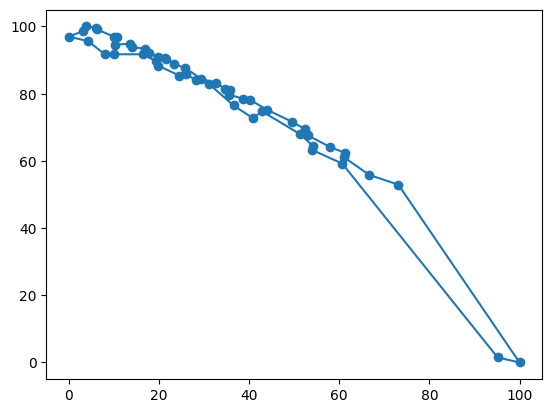

Route: [ 0 26 36 31 33 48 50 37 41  4 27  9  5 13 14 42 19 10 39 22 29 12 28  3
 17 21 30  2  1 47 34 46 11 15 45 18 44  6 24 51 43 16 20  8 25 23 35 49
  7 38 40 32]

Distance_scaled: 304.70076226291434


In [ ]:
#PLOT IN CARTESIAN


import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([scaled[route[i]] for i in range(len(route))]),np.array([scaled[0]])))
# Plot the cities.
plt.scatter(scaled[:,0],scaled[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance_scaled: " + str(path_distance(route,scaled)))


In [ ]:
#unit of scale = ()Max (Lng or Lat) - Min(Lng or Lat)) /100
#unit of scale = 53.31km

Distance_km = path_distance(route,scaled) * 53.31
Distance_km

16243.597636235963

THUS, Distance is 16,839 km

In [ ]:
order = pd.DataFrame(route, columns=["index"])
cities2["index"] = cities2.index
cities2
travel=order.merge(cities2, on = "index")




In [ ]:

start= travel[0:1]
loop = travel.append(start)
loop


<ipython-input-61-690f2d8a57e4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loop = travel.append(start)


,index,Capital,Provincia,Poblacion,Latitude,Longitude,XUTM ETRS89,YUTM ETRS89,Altura (m),lat_radians,lon_radians,x,y
0,0,A Coru¤a,A Coru¤a,246.047,43.370126,-8.391149,549327.6194,4802098.023,21.000,0.756952,-0.146453,4581.710498,4328.185330
1,26,Lugo,Lugo,97.635,43.009128,-7.558174,617504.3521,4762837.068,452.000,0.750651,-0.131915,4618.285992,4307.997152
2,36,Pontevedra,Pontevedra,81.981,42.433814,-8.647990,528953.7860,4698003.983,16.000,0.740610,-0.150936,4648.702887,4249.882866
3,31,Ourense,Ourense,108.673,42.336549,-7.863684,593610.0865,4687769.206,138.000,0.738912,-0.137247,4665.167665,4250.419033
4,33,Palencia,Palencia,82.169,42.007837,-4.534601,372921.9727,4651785.447,734.000,0.733175,-0.079144,4719.174029,4250.332387
5,48,Valladolid,Valladolid,315.522,41.652328,-4.723349,356499.4918,4612610.279,690.000,0.726970,-0.082438,4744.189951,4219.843468
6,50,Zamora,Zamora,65.998,41.499140,-5.754948,270050.3784,4597833.322,649.000,0.724297,-0.100443,4747.610467,4200.203824
7,37,Salamanca,Salamanca,154.462,40.967368,-5.665381,275715.3682,4538556.266,798.000,0.715015,-0.098880,4787.136429,4156.609900
8,41,Segovia,Segovia,55.748,40.949870,-4.125241,405292.9612,4533801.766,1.002,0.714710,-0.071999,4799.443127,4164.725550
9,4,µvila,µvila,58.245,40.655870,-4.697713,356476.5099,4501942.030,1.131,0.709579,-0.081991,4817.035702,4136.853521


<Axes: xlabel='Longitude'>

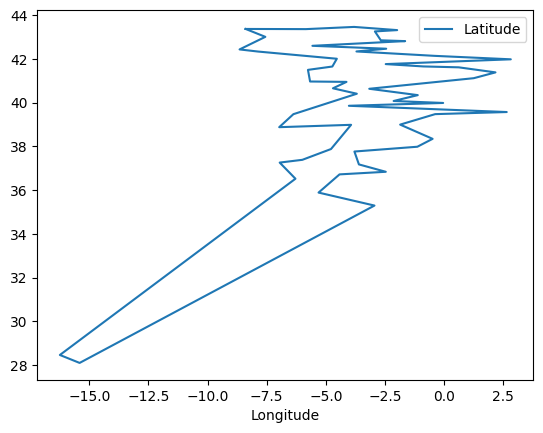

In [ ]:
#PLOT IN LONGITUDE AND LATITUDE


loop.plot(kind="line", x="Longitude", y="Latitude")

In [ ]:
#WRITING CSV FILE WITH route

tsp = loop[["Latitude", "Longitude"]]

tsp.to_csv('tsp.csv', index=False)

from google.colab import files
files.download("tsp.csv")





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

csv file dowloaded: https://github.com/Albina1810/tsp/blob/master/tsp.csv

upload csv file with latitude and longitude here for visualization: http://www.gpsvisualizer.com/draw/

![alt text](https://pbs.twimg.com/media/D0optu0U0AEC4WN.jpg:large)

# **CONCLUSION **

 2-opt  swap algorithm was used.


**The shortest distance is 16,800 km**

**The route goes through the capitals of the following states**( Alabama, Illinois, Mississippi, Missouri, Minnesota, Iowa, Kansas, Nebraska, South Dakota, North Dakota, Montana, Idaho, Oregon, Washington, Alaska, Hawaii, California, Nevada, Utah, Arizona, New Mexico, Colorado, Wyoming, Oklahoma, Texas, Arkansas, Lousiana, Wisconsin, Tennessee, Indiana, Kentucky, Michigan, Ohio, West Virginia, New York, Vermont, New Hampshire, Maine, Massachusetts, Rhode Island, Connecticut, New Jersey, Delaware, Maryland, Virginia, North Carolina, South Carolina, Georgia, Florida, Alabama)


